# Melbourne Housing - Data analisys

The objective of this analysis is to explore the Melbourne housing dataset in order to identify how property prices behave across regions, suburbs, land size, and location, using exploratory data analysis and geospatial visualization.

The dataset was first inspected to understand its structure, available features, and overall completeness.
Most core variables such as price, location, and property characteristics are well populated, enabling exploratory analysis.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import zipfile
from pathlib import Path

In [2]:
file_path = Path("archive.zip")
folder = Path("data")

with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall(folder)

csv_path = folder / "melb_data.csv"
df = pd.read_csv(csv_path)

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
df.shape

(13580, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
df["Price"].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

In [8]:
df.isnull().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Price               0
Type                0
Rooms               0
Address             0
Distance            0
Method              0
Date                0
SellerG             0
Bathroom            0
Bedroom2            0
Postcode            0
Landsize            0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
(df.isnull().mean() * 100).sort_values(ascending=False)

BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Car               0.456554
Suburb            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Address           0.000000
Distance          0.000000
Method            0.000000
Date              0.000000
SellerG           0.000000
Bathroom          0.000000
Bedroom2          0.000000
Postcode          0.000000
Landsize          0.000000
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

Missing Data Evaluation

Some variables contain a large number of missing values, notably BuildingArea and YearBuilt.
Due to the high proportion of null entries, these variables were excluded from the analysis to avoid introducing bias or unreliable assumption

### Prices Analisys

Property prices present a right-skewed distribution with significant outliers.
Because of this, the median is used as the primary measure of central tendency instead of the mean.

1 - By Region

The analysis starts by examining property prices across Melbourne regions.
Significant price disparities are observed, reinforcing that regional location is a major determinant of property value.

Median prices are preferred over averages due to the presence of high-value outliers that skew the mean.

In [10]:
priceByRegion = (
    df.groupby("Regionname")
      .agg(
          avg_price=("Price", "mean"),
          median_price=("Price", "median"),
          listings=("Price", "count")
      )
      .sort_values("median_price", ascending=False)
      .reset_index()
)

pd.options.display.float_format = '{:,.2f}'.format
priceByRegion


,Regionname,avg_price,median_price,listings
0,Southern Metropolitan,"1,372,963.37","1,250,000.00",4695
1,Eastern Metropolitan,"1,104,079.63","1,010,000.00",1471
2,South-Eastern Metropolitan,"922,943.78","850,000.00",450
3,Northern Metropolitan,"898,171.08","806,250.00",3890
4,Western Metropolitan,"866,420.52","793,000.00",2948
5,Eastern Victoria,"699,980.79","670,000.00",53
6,Northern Victoria,"594,829.27","540,000.00",41
7,Western Victoria,"397,523.44","400,000.00",32


In [11]:
fig = px.bar(
    priceByRegion,
    x="Regionname",
    y="avg_price",
    title="Average property price by region",
    text_auto=".2s"
)

fig.update_layout(
    xaxis_title = "Region",
    yaxis_title = "Average Price",
    yaxis_tickprefix = "$"
)

fig.show()

2 - Price Analysis by Land Size

Property prices were analyzed based on land size to evaluate whether larger parcels consistently command higher prices.
While price generally increases with land size at lower ranges, this trend does not hold for very large plots.

This suggests diminishing returns as land size grows.

In [12]:
df["Landsize_bin"] = pd.cut(
    df["Landsize"],
    bins = [0, 100, 200, 300, 500, 800, 1200, 2000, df["Landsize"].max()],
    labels=["0-100", "100-200", "200-300", "300-500", "500-800", "800-1200", "1200-2000", "2000+"]
)

priceByLandSize = (
    df.groupby("Landsize_bin")
    .agg(
        median_price = ("Price", "median"),
        listing = ("Price", "count")
    )
    .query("listing >= 50")
    .reset_index()
)

priceByLandSize

C:\Users\FinanceiroKieling\AppData\Local\Temp\ipykernel_33176\1478887360.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Landsize_bin,median_price,listing
0,0-100,"696,500.00",328
1,100-200,"868,500.00",1548
2,200-300,"950,000.00",1454
3,300-500,"1,045,000.00",2136
4,500-800,"1,011,000.00",4807
5,800-1200,"1,194,700.00",931
6,1200-2000,"782,000.00",199
7,2000+,"650,000.00",238


In [13]:
fig = px.bar(
    priceByLandSize,
    x="Landsize_bin",
    y="median_price",
    title="Median property price by land size",
    text_auto=".2s"
)

fig.update_layout(
    xaxis_title = "Land Size",
    yaxis_title = "Median price",
    yaxis_tickprefix = "$"
)

fig.show()

3 - Price × Land Size × Region Analysis

Land size and price were further analyzed jointly by region to understand regional differences.
In several regions, particularly high-demand areas, prices decrease for very large land sizes.

This indicates that location outweighs land size, and large plots are often located in less desirable or less central areas.

In [14]:
priceLandRegion = (
    df.groupby(["Regionname", "Landsize_bin"])
    .agg(
        median_price = ("Price", "median"),
        listings = ("Price", "count")
    )
    .query("listings >= 30")
    .reset_index()
)

priceLandRegion


C:\Users\FinanceiroKieling\AppData\Local\Temp\ipykernel_33176\2933034776.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Regionname,Landsize_bin,median_price,listings
0,Eastern Metropolitan,100-200,"652,500.00",90
1,Eastern Metropolitan,200-300,"780,000.00",111
2,Eastern Metropolitan,300-500,"838,000.00",169
3,Eastern Metropolitan,500-800,"1,155,000.00",761
4,Eastern Metropolitan,800-1200,"1,175,000.00",217
5,Eastern Metropolitan,1200-2000,"1,435,000.00",36
6,Northern Metropolitan,0-100,"827,000.00",140
7,Northern Metropolitan,100-200,"938,500.00",698
8,Northern Metropolitan,200-300,"955,000.00",413
9,Northern Metropolitan,300-500,"973,750.00",662


In [15]:
fig = px.line(
    priceLandRegion,
    x = "Landsize_bin",
    y = "median_price",
    color = "Regionname",
    markers=True,
    title= "Median Property price by Land Size and Region"
)

fig.update_layout(
    xaxis_title = "Land Size (m²)",
    yaxis_title = "Median Price",
    yaxis_tickprefix = "$",
    template = "plotly_white"
)

fig.show()

In [16]:
fig = px.box(
    df,
    x = "Landsize_bin", 
    y = "Price",
    color = "Regionname",
    title = "Price Distirbudion by Land Size and Region"
)

fig.update_layout(
    xaxis_title = "Land Size (m²)",
    yaxis_title = "Median Price",
    yaxis_tickprefix = "$",
    template = "plotly_white"
)

fig.show()

In [17]:
fig = px.scatter(
    df,
    x = "Landsize",
    y = "Price",
    color = "Regionname",
    opacity = 0.4,
    title = "Property Price vs Land Size by Region"
)

fig.update_layout(
    xaxis_title = "Land Size (m²)",
    yaxis_title = "Median Price",
    yaxis_tickprefix = "$",
    template = "plotly_white"
)

fig.show()

4 - Price Analysis by Suburb

A suburb-level analysis provides a finer geographic resolution.
Even within the same region, median prices vary significantly between suburbs.

To ensure meaningful comparisons, only suburbs with a sufficient number of listings were included.

In [18]:
priceBySuburb = (
    df.groupby("Suburb")
    .agg(
        median_price = ("Price", "median"),
        listings = ("Price", "count"),
    )
    .query("listings >= 50")
    .sort_values("median_price", ascending=False)
    .reset_index()
)

priceBySuburb

,Suburb,median_price,listings
0,Albert Park,"1,900,000.00",69
1,Canterbury,"1,890,000.00",54
2,Balwyn,"1,850,000.00",107
3,Brighton,"1,773,500.00",186
4,Balwyn North,"1,739,000.00",171
...,...,...,...
87,Heidelberg West,"648,125.00",76
88,Sunshine West,"591,500.00",86
89,St Kilda,"570,000.00",162
90,Epping,"560,500.00",52


In [19]:
top10 = priceBySuburb.head(10)
bottom10 = priceBySuburb.tail(10)

top10["group"] = "Top 10"
bottom10["group"] = "Bottom 10"

suburb_extremes = (
    pd.concat([top10, bottom10])
    .sort_values("median_price", ascending=True)
)

fig = px.bar(
    suburb_extremes,
    x = "median_price",
    y = "Suburb",
    color = "group",
    orientation = "h",
    title = "Top 10 and Bottom 10 Suburbs by Median Property Price",
    text = suburb_extremes["median_price"].map(lambda x: f"${x:,.0f}")
)

fig.update_layout(
    xaxis_title = "Median Price",
    yaxis_title = "Suburb",
    xaxis_tickprefix = "$",
    template = "plotly_white",
    legend_title_text = ""
)

fig.update_traces(
    hovertemplate=
    "<b>%{y}</b><br>" +
    "Median Price: %{x:$,.0f}<br>" +
    "Listings: %{customdata[0]}",
    customdata=suburb_extremes[["listings"]].values
)

fig.show()

C:\Users\FinanceiroKieling\AppData\Local\Temp\ipykernel_33176\897452995.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\FinanceiroKieling\AppData\Local\Temp\ipykernel_33176\897452995.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5 - Impact of Room, Bedroom, and Bathroom Counts

Structural characteristics such as number of rooms, bedrooms, and bathrooms were analyzed across price tiers and regions.
These variables show relatively limited variation and appear to act as secondary price modifiers rather than primary drivers.

This reinforces the dominance of location over property layout.

In [20]:
df["Price_bin"] = pd.qcut(
    df["Price"],
    q = 4,
    labels = ["Low", "Mid", "High", "Premium"]
)

In [21]:
roomsByPriceByRegion = (
    df.groupby(["Regionname", "Price_bin"])
    .agg(
        median_rooms = ("Rooms", "median"),
        median_bedrooms = ("Bedroom2", "median"),
        median_bathrooms = ("Bathroom", "median"),
        listings = ("Price", "count")
    )
    .query("listings >= 30")
    .reset_index()
)

fig = px.density_heatmap(
    roomsByPriceByRegion,
    x="Price_bin",
    y="Regionname",
    z="median_rooms",
    color_continuous_scale="Blues",
    title="Median Number of Rooms by Price Tier and Region"
)

fig.update_layout(
    xaxis_title="Price Tier",
    yaxis_title="Region",
    template="plotly_white"
)

fig.show()

C:\Users\FinanceiroKieling\AppData\Local\Temp\ipykernel_33176\2716363923.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



6 - Geospatial Visualization of Properties

A geospatial visualization was used to map individual properties across Melbourne.
Clear spatial clustering of prices emerges, with higher-priced properties concentrated in central and premium areas.

Using price categories instead of continuous values improves visual clarity and highlights regional segmentation.

In [22]:
fig = px.scatter_mapbox(
    df,
    lat="Lattitude",
    lon="Longtitude",
    color="Price_bin",
    color_continuous_scale="Turbo",
    zoom=9,
    opacity=0.6,
    hover_data=[
        "Suburb",
        "Price",
        "Rooms",
        "Bathroom",
        "Bedroom2",
        "Landsize"
    ]
)

fig.update_layout(
    mapbox_style="carto-positron",
    margin={"r":0, "t":0, "l":0, "b":0}
)

fig.show()

C:\Users\FinanceiroKieling\AppData\Local\Temp\ipykernel_33176\2303998721.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Final Takeaways

Location is the strongest factor influencing property prices in Melbourne.
Land size has diminishing impact beyond certain thresholds, and structural features provide marginal adjustments rather than defining value.
Geospatial analysis confirms and visually reinforces these findings.

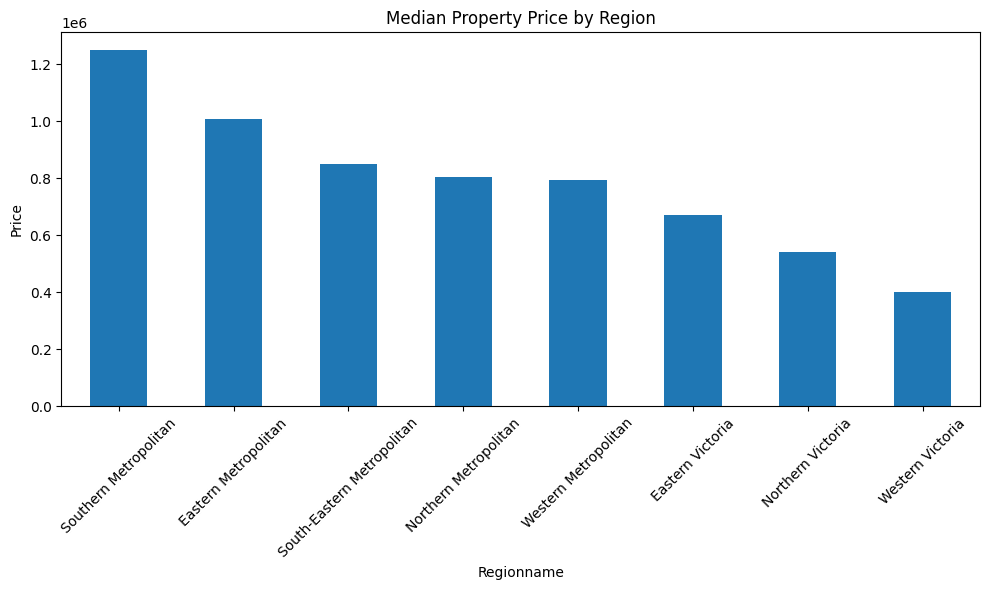

In [23]:
## Teste matplot | O Kaggle não suporta bem plotly na visualização pública
## MAtplot e Seaborn renderizam imagens fixas aou invés de usar JS, resolvendo o problema de renderização no Kaggle

import matplotlib.pyplot as plt

price_by_region = (
    df.groupby("Regionname")["Price"]
      .median()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
price_by_region.plot(kind="bar")
plt.title("Median Property Price by Region")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

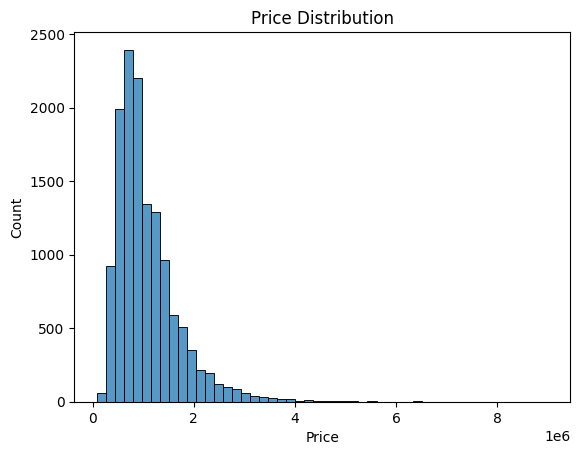

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Price"], bins=50)
plt.title("Price Distribution")
plt.show()